### Read Data from json files and load to Padas DataFrame

In [28]:
import pandas as pd
import json

In [29]:
# file directory
file_business, file_review = [
    'data\\business.json',
    'data\\review.json'
]

In [30]:
# loading business data to pandas
with open(file_business, encoding = 'utf-8') as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [31]:
df_business.head(5)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV


In [32]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
address         188593 non-null object
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
hours           143791 non-null object
is_open         188593 non-null int64
latitude        188587 non-null float64
longitude       188587 non-null float64
name            188593 non-null object
neighborhood    188593 non-null object
postal_code     188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


In [33]:
# remove closed business
df_business = df_business[df_business['is_open'] == 1]

In [34]:
# loading business data to pandas
with open(file_review, encoding = 'utf-8') as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)

In [35]:
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g


In [36]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996996 entries, 0 to 5996995
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: int64(4), object(5)
memory usage: 411.8+ MB


### Data Clean and data analysis

In [37]:
# here we only care about the review made after 2015
# because the reviews made before 2015 may not able to reflect 
# current condition of the business

df_review_after_2015 = df_review[df_review['date'] > '2015-01-01']

In [38]:
# select features from review dataset
selected_features = ['business_id','cool','funny','stars','text','useful','user_id']
df_review_after_2015 = df_review_after_2015.filter(items = selected_features)

In [39]:
df_review_after_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855973 entries, 10 to 5996995
Data columns (total 7 columns):
business_id    object
cool           int64
funny          int64
stars          int64
text           object
useful         int64
user_id        object
dtypes: int64(4), object(3)
memory usage: 235.3+ MB


In [40]:
# due to the limited memory resource
# here i only take business with specific location
df_business_selected_location = df_business[df_business['city'] == 'Las Vegas'] 

In [41]:
# select features from business dataset
selected_features = ['business_id','stars','categories','attributes']
df_business_selected_features = df_business_selected_location.filter(items = selected_features)

In [42]:
# rename the column name "stars" to "avg_stars" in business dataset to aviod nameing conflicts with review dataset
df_business_selected_features = df_business_selected_features.rename(index = str, columns = {"stars":"avg_stars"})

In [43]:
# remove null row for categories column and attributes column
cond_category_not_null = ~df_business_selected_features['categories'].isnull()
cond_attribute_not_null = ~df_business_selected_features['attributes'].isnull()
df_business_selected_features = df_business_selected_features[cond_category_not_null & cond_attribute_not_null]

In [46]:
# we only take restaurant business
cond_category_restaurant = df_business_selected_features["categories"].str.contains("Restaurants")
df_business_selected_features = df_business_selected_features[cond_category_restaurant]

In [47]:
df_business_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4025 entries, 32 to 188567
Data columns (total 4 columns):
business_id    4025 non-null object
avg_stars      4025 non-null float64
categories     4025 non-null object
attributes     4025 non-null object
dtypes: float64(1), object(3)
memory usage: 157.2+ KB


In [48]:
# set business_id as the index of two data frames
df_business_selected_features = df_business_selected_features.set_index('business_id')
df_review_after_2015 = df_review_after_2015.set_index('business_id')

In [49]:
# combine two dataset
df_join = df_review_after_2015.join(df_business_selected_features,how = 'inner')
df_join.reset_index(inplace = True)

In [50]:
df_join.head(2)

,business_id,cool,funny,stars,text,useful,user_id,avg_stars,categories,attributes
0,--9e1ONYQuAa-CB_Rrw7Tw,0,0,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA,4.0,"Steakhouses, Restaurants, Cajun/Creole","{'Alcohol': 'full_bar', 'Ambience': '{'romanti..."
1,--9e1ONYQuAa-CB_Rrw7Tw,0,0,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og,4.0,"Steakhouses, Restaurants, Cajun/Creole","{'Alcohol': 'full_bar', 'Ambience': '{'romanti..."


In [51]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586927 entries, 0 to 586926
Data columns (total 10 columns):
business_id    586927 non-null object
cool           586927 non-null int64
funny          586927 non-null int64
stars          586927 non-null int64
text           586927 non-null object
useful         586927 non-null int64
user_id        586927 non-null object
avg_stars      586927 non-null float64
categories     586927 non-null object
attributes     586927 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 44.8+ MB


In [52]:
# store the data
df_join.to_csv("data\\review_classification.csv", index = False, encoding='utf-8')

### Visualize Data

In [53]:
import matplotlib.pyplot as plt
% matplotlib inline

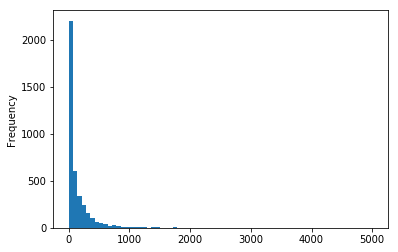

In [54]:
df_join['business_id'].value_counts().plot.hist(bins =70)
plt.show()